In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/IMDB Dataset.csv', engine='python')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df_positive=df[df['sentiment']=='positive'][:9000]
df_negative=df[df['sentiment']=='negative'][:1000]

In [5]:
#concatenate
df_imb=pd.concat([df_positive,df_negative])

In [6]:
df_imb.value_counts(['sentiment'])

,count
sentiment,
positive,9000
negative,1000


<Axes: xlabel='sentiment'>

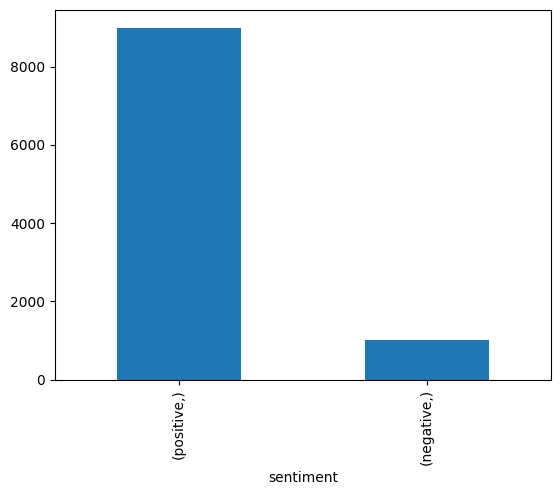

In [7]:
#undersampling and oversampling
df_imb.value_counts(['sentiment']).plot(kind='bar')


In [8]:
#undersample_clasdf_s
length_negative=len(df_imb[df_imb['sentiment']=='negative'])
length_negative

1000

In [9]:
df_positive_undersample=df_imb[df_imb['sentiment']=='positive'].sample(n=length_negative)

In [10]:
df_negative_undersample=df_imb[df_imb['sentiment']=='negative']

In [11]:
df_reviews_bal_undersample=pd.concat([df_positive_undersample,df_negative_undersample])

In [12]:
df_reviews_bal_undersample.reset_index(drop=True,inplace=True)

In [13]:
df_reviews_bal_undersample.value_counts('sentiment')

,count
sentiment,
negative,1000
positive,1000


In [14]:
#otherway
!pip install imblearn

In [15]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
rus=RandomUnderSampler(random_state=0) #instant of undersampling class

In [17]:
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_imb[['review']],df_imb['sentiment'])

In [18]:
df_review_bal.value_counts('sentiment')
#

,count
sentiment,
negative,1000
positive,1000


In [19]:
df_imb.value_counts('sentiment')

,count
sentiment,
positive,9000
negative,1000


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#split data into train and test
train,test=train_test_split(df_review_bal,test_size=0.33,random_state=42)

In [22]:
train

,review,sentiment
144,"I just got back from this free screening, and ...",negative
1839,Claire Denis's movies seem to fall into one of...,negative
16588,"One must admit, that Dev has an eye for beauty...",positive
742,Mario Lewis of the Competitive Enterprise Inst...,negative
9464,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
10644,I saw the movie in Izmir as the closing film o...,positive
16133,This is a great documentary and above comments...,positive
1739,"Obviously, the comments above that fawn over t...",negative
2443,Robert Carlyle excels again. The period was ca...,positive


In [23]:
test

,review,sentiment
11301,Refreshing `lost' gem! Featuring effective dia...,positive
681,Never saw the original movie in the series...I...,negative
7513,"Once upon a time, in Sweden, there was a poor ...",positive
1821,"At the beginning of the film, you might double...",negative
549,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
207,"I have seen most, if not all of the Laurel & H...",negative
7616,D.W. Griffith could have made any film he want...,positive
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
1051,I rented this movie with my friend for a good ...,negative


In [24]:
train_x,train_y=train['review'],train['sentiment']

In [25]:
test_x,test_y=test['review'],test['sentiment']

In [26]:
#bag of words


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
text=['I love writing code in python.I love python code',
      'I hate writing code in java.I hate java code'
      ]

In [29]:
df_test=pd.DataFrame({'review':['review1','reviwe2'],'text':text})

In [30]:
cv=CountVectorizer(stop_words='english')
cv_matrix=cv.fit_transform(df_test['text'])

In [31]:
df_dtm=pd.DataFrame(cv_matrix.toarray(),index=df_test['review'].values,columns=cv.get_feature_names_out())

In [32]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
reviwe2,2,2,2,0,0,1


In [33]:
#tf_idf


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once your Drive is mounted, you can use a shell command to move the file. Replace `your_file_name.csv` with the actual name of your file and `your_destination_folder` with the folder in your Google Drive where you want to move the file.

In [38]:
!mv "/content/IMDB Dataset.csv" "/content/drive/MyDrive/learning_colab_datasets/"


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tfidf=TfidfVectorizer(stop_words='english',norm=None)

In [46]:
matrix=tfidf.fit_transform(df_test['text'])

In [47]:
pd.DataFrame(matrix.toarray(),index=df_test['review'].values,columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
reviwe2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


In [48]:
train

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf2=TfidfVectorizer(stop_words='english')

In [52]:
train_x_vector=tfidf2.fit_transform(train_x)

In [53]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118834 stored elements and shape (1340, 20625)>

In [55]:
pd.DataFrame(train_x_vector.toarray(),index=train_x.index,columns=tfidf2.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
test_x_vector=tfidf2.transform(test_x)

In [57]:
#svm supervised classification
from sklearn.svm import SVC

In [60]:
svc=SVC(kernel='linear')
svc.fit(train_x_vector,train_y)

SVC(kernel='linear')

In [61]:
svc.predict(tfidf2.transform(['A good movie']))

array(['positive'], dtype=object)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train_x_vector,train_y)

DecisionTreeClassifier()

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gnb=GaussianNB()

In [68]:
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

In [71]:
#model evaluation
print(svc.score(test_x_vector,test_y))
print(dec_tree.score(test_x_vector,test_y))
print(gnb.score(test_x_vector.toarray(),test_y))


0.8409090909090909
0.6606060606060606
0.6348484848484849


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,svc.predict(test_x_vector),labels=['positive','negative'])
#

array([[290,  45],
       [ 60, 265]])

In [74]:
from sklearn.metrics import f1_score
f1_score(test_y,svc.predict(test_x_vector),labels=['positive','negative '],average=None)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.84671533, 0.        ])

In [75]:
#CLASSIFICATION REP
from sklearn.metrics import classification_report
cr=classification_report(test_y,svc.predict(test_x_vector),labels=['positive','negative'])

In [76]:
cr

'              precision    recall  f1-score   support\n\n    positive       0.83      0.87      0.85       335\n    negative       0.85      0.82      0.83       325\n\n    accuracy                           0.84       660\n   macro avg       0.84      0.84      0.84       660\nweighted avg       0.84      0.84      0.84       660\n'